In [245]:
%reset -fs

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix

In [246]:
''' 
# columns needed

gold diff 15m
gold trend 1 3 5
tower diff
dragon diff
kill diff
herald diff
# convert columns
# run regression'''

' \n# columns needed\n\ngold diff 15m\ngold trend 1 3 5\ntower diff\ndragon diff\nkill diff\nherald diff\n# convert columns\n# run regression'

In [247]:
filepath = 'csvs/LeagueofLegends.csv'
df = pd.read_csv(filepath)
df.head()

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,golddiff,...,redMiddleChamp,goldredMiddle,redADC,redADCChamp,goldredADC,redSupport,redSupportChamp,goldredSupport,redBans,Address
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,"[0, 0, -14, -65, -268, -431, -488, -789, -494,...",...,Fizz,"[475, 475, 552, 842, 1178, 1378, 1635, 1949, 2...",Sneaky,Sivir,"[475, 475, 532, 762, 1097, 1469, 1726, 2112, 2...",LemonNation,Thresh,"[515, 515, 577, 722, 911, 1042, 1194, 1370, 14...","['Tristana', 'Leblanc', 'Nidalee']",http://matchhistory.na.leagueoflegends.com/en/...
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,"[0, 0, -26, -18, 147, 237, -152, 18, 88, -242,...",...,Azir,"[475, 475, 552, 786, 1097, 1389, 1660, 1955, 2...",CoreJJ,Corki,"[475, 475, 532, 868, 1220, 1445, 1732, 1979, 2...",KiWiKiD,Annie,"[515, 515, 583, 752, 900, 1066, 1236, 1417, 15...","['RekSai', 'Janna', 'Leblanc']",http://matchhistory.na.leagueoflegends.com/en/...
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,"[0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ...",...,Azir,"[475, 475, 533, 801, 1006, 1233, 1385, 1720, 1...",Cop,Corki,"[475, 475, 533, 781, 1085, 1398, 1782, 1957, 2...",BunnyFuFuu,Janna,"[515, 515, 584, 721, 858, 1002, 1168, 1303, 14...","['Leblanc', 'Zed', 'RekSai']",http://matchhistory.na.leagueoflegends.com/en/...
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,"[0, 0, -15, 25, 228, -6, -243, 175, -346, 16, ...",...,Lulu,"[475, 475, 532, 771, 1046, 1288, 1534, 1776, 2...",KEITH,KogMaw,"[475, 475, 532, 766, 1161, 1438, 1776, 1936, 2...",Xpecial,Janna,"[515, 515, 583, 721, 870, 1059, 1205, 1342, 15...","['RekSai', 'Rumble', 'LeeSin']",http://matchhistory.na.leagueoflegends.com/en/...
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,"[40, 40, 44, -36, 113, 158, -121, -191, 23, 20...",...,Lulu,"[475, 475, 532, 807, 1042, 1338, 1646, 1951, 2...",Maplestreet8,Corki,"[475, 475, 532, 792, 1187, 1488, 1832, 2136, 2...",Dodo8,Annie,"[475, 475, 538, 671, 817, 948, 1104, 1240, 136...","['Rumble', 'Sivir', 'Rengar']",http://matchhistory.na.leagueoflegends.com/en/...


In [248]:

def format_kills(unf): # formatting kills -> kill times
    if len(unf) <= 2:
        return []
    form = unf[2:-2].split('], [')
    for z in range(len(form)):
        form[z] = float(form[z][:6].strip(", 'N"))
    form.sort()
    return form

def eventcount(events): # Counting the events in a list
    return len(events)

def trunc_time(time_list): # getting rid of events past a certain point
    #print(time_list, i)
    if time_list == None:
        return []
    return [time for time in time_list if time < i]

In [249]:
dff = df[['bResult', 'gamelength', 'bKills', 'bTowers', 'bInhibs', 'bDragons', 'bBarons', 'bHeralds', 'rKills',
          'rTowers', 'rInhibs', 'rDragons', 'rBarons', 'rHeralds', 'golddiff', 'goldblueTop', 'goldblueJungle',
          'goldblueMiddle', 'goldblueADC', 'goldblueSupport', 'goldredTop', 'goldredJungle', 'goldredMiddle',
          'goldredADC', 'goldredSupport', 'Address']] # Taking columns I care about
for i in dff.columns[14:25]: # formatting gold columns
    dff.loc[:,i] = dff.loc[:,i].apply(lambda x: x.strip('[]').split(', '))
for i in dff.columns[2:14]: # formatting kill/objective columns
    dff.loc[:,i] = dff.loc[:,i].apply(format_kills)

/Users/dayvdoberne/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [250]:
df.bResult.mean()

0.5440944881889764

In [251]:
def deep_golddiff(gold_list):
    list_out = []
    for z in gold_list:
        list_out.append(0-int(z))
    return list_out

In [252]:
#reversing dataframe
'''dfc = dff.copy()
dfrv = pd.DataFrame(columns = dfc.columns)
dfrv['bResult'] = (dfc['bResult'] - 1) * (-1)
dfrv['gamelength'] = dfc['gamelength']
dfrv['golddiff'] = dfc['golddiff'].apply(deep_golddiff)
dfrv['Address'] = dfc['Address']
for i, j in zip(dfrv.columns[2:8], dfc.columns[8:14]):
    dfrv[i] = dfc[j]
for i, j in zip(dfrv.columns[8:14], dfc.columns[2:8]):
    dfrv[i] = dfc[j]

for i, j in zip(dfrv.columns[15:20], dfc.columns[20:25]):
    dfrv[i] = dfc[j]
for i, j in zip(dfrv.columns[20:25], dfc.columns[15:20]):
    dfrv[i] = dfc[j]
    
dff = dff.append(dfrv)'''

"dfc = dff.copy()\ndfrv = pd.DataFrame(columns = dfc.columns)\ndfrv['bResult'] = (dfc['bResult'] - 1) * (-1)\ndfrv['gamelength'] = dfc['gamelength']\ndfrv['golddiff'] = dfc['golddiff'].apply(deep_golddiff)\ndfrv['Address'] = dfc['Address']\nfor i, j in zip(dfrv.columns[2:8], dfc.columns[8:14]):\n    dfrv[i] = dfc[j]\nfor i, j in zip(dfrv.columns[8:14], dfc.columns[2:8]):\n    dfrv[i] = dfc[j]\n\nfor i, j in zip(dfrv.columns[15:20], dfc.columns[20:25]):\n    dfrv[i] = dfc[j]\nfor i, j in zip(dfrv.columns[20:25], dfc.columns[15:20]):\n    dfrv[i] = dfc[j]\n    \ndff = dff.append(dfrv)"

In [253]:
# to do:
# pick match to illustrate
# calculate in sheets
# illustrate in Tableau
# presentation
# writeup

In [254]:
dff.loc[0,'bKills']

[10.82,
 16.286,
 18.733,
 18.88,
 27.005,
 27.029,
 27.109,
 28.989,
 29.073,
 30.104,
 32.801,
 32.85,
 33.017,
 38.889,
 38.906,
 38.964]

In [255]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

In [344]:
# Setting up a results dataframe

dfr = pd.DataFrame(columns = ['time', 'bKills', 'bTowers', 'bInhibs', 'bDragons', 'bBarons', 'bHeralds', 'rKills',
                              'rTowers', 'rInhibs', 'rDragons', 'rBarons', 'rHeralds', 'golddiff-3',
                              'golddiffTop', 'golddiffJungle', 'golddiffMiddle', 'golddiffADC', 'golddiffSupport', 'score', 'random_forest_score'])

dfex = pd.DataFrame(columns = ['time', 'bKills', 'bTowers', 'bInhibs', 'bDragons', 'bBarons', 'bHeralds', 'rKills',
                              'rTowers', 'rInhibs', 'rDragons', 'rBarons', 'rHeralds', 'golddiff-3',
                              'goldredTop', 'goldredJungle', 'goldredMiddle', 'goldredADC', 'goldredSupport'])
    
    
wp = []
# Running through each minute of the game to develop a different model
for i in range(5, 48, 1):
    dft = dff[dff.columns[:25]]
    dft = dft.loc[dft['gamelength'] > i] # filtering out for when the game is longer than the model
    for c in dft.columns[2:14]: # counting the objectives at or before the time
        #print(dft[c])
        dft.loc[:, c] = dft.loc[:, c].apply(trunc_time)
        dft.loc[:, c] = dft.loc[:, c].apply(eventcount)
    for c in dft.columns[15:25]: # picking the right gold amount out of the list
        dft[c] = dft[c].apply(lambda j: int(j[i]))
    
    # recent gold differential
    dft['golddiff-1'] = dft['golddiff'].apply(lambda j: int(j[i]) - int(j[i-1]))
    dft['golddiff-3'] = dft['golddiff'].apply(lambda j: int(j[i]) - int(j[i-3]))
    dft['golddiff-5'] = dft['golddiff'].apply(lambda j: int(j[i]) - int(j[i-5]))
    
    
    # lane gold differential
    for j in ['Top', 'Jungle', 'Middle', 'ADC', 'Support']:
        dft['goldred' + j] = dft['goldblue' + j] - dft['goldred' + j]
        
    X = dft[['bKills', 'bTowers', 'bInhibs', 'bDragons', 'bBarons', 'bHeralds', 'rKills',
             'rTowers', 'rInhibs', 'rDragons', 'rBarons', 'rHeralds', 'golddiff-3',
             'goldredTop', 'goldredJungle', 'goldredMiddle', 'goldredADC', 'goldredSupport']]
    y = dft['bResult']
    
    
    '''kf = KFold(n_splits = 5, shuffle = True, random_state = 4)
    
    cv_lm = []
    for train_ind, val_ind in kf.split(X_train, y_train):
        print(train_ind)
        print(val_ind)
        X_trainv, y_trainv = X_train[train_ind], y_train[train_ind]
        x_val, y_val = X_train[val_ind], y_train[val_ind]
        lm = LogisticRegression(C = 1000)
        lm.fit(X_trainv, y_trainv)
        cv_lm.append(lm.score(X_val, y_val).round(3))
    print(cv_lm)'''

    
    
    #print(dft_row)
    #print((lm.predict(X_test) == y_test).mean())
    #print(str(i) + " score: " + str(lm.score(X_test,y_test)))
    
    #scoring the mirror
    '''for y, z in [(0, 6), (1, 7), (2, 8), (3, 9), (4, 10), (5, 11), (15, 20), (16, 21), (17, 22), (18, 23), (19, 24)]:
        lm.coef_[0][y] = (lm.coef_[0][y] - lm.coef_[0][z])/2
        lm.coef_[0][z] = 0 - lm.coef_[0][y]'''
    
    
    dfr_instance = pd.DataFrame(columns = dfr.columns[:-1])
    
    
    std_scale = StandardScaler() # Scaling
    X_scaled = std_scale.fit_transform(X)
    for j in range(0, 5):        
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 5 * j)
        lm = LogisticRegression(C = 100) # Fitting Logistic Regression
        lm.fit(X_train, y_train)
        # Setting up row for results table
        res_row = [i]
        
        for k in lm.coef_[0]:
            res_row.append(k)
        res_row.append(lm.score(X_test, y_test))
        dfr_instance.loc[i] = res_row
    
    dft_row = []
    for j in dfr_instance.columns:
        dft_row.append(dfr_instance[j].mean())
    
    # Adding to the example data
    lm.coef_[0] = dft_row[1:-1]
    dfex_row = [i]
    if i < 29:
        for j in dfex.columns[1:]:
            dfex_row.append(X.loc[570, j])
        dfex.loc[i] = dfex_row
        print(lm.predict_proba(X_scaled[570].reshape(1, -1))[0][1])
        wp.append(lm.predict_proba(X_scaled[570].reshape(1, -1))[0][1])
    
    randomforest = RandomForestClassifier(n_estimators = 100, min_samples_split = 5)
    randomforest.fit(X_train, y_train)
    
    dft_row.append(randomforest.score(X_test, y_test))
    
    #print(str(i) + " mirror score: " + str(lm.score(X_test,y_test)))
    
    
    dfr.loc[i] = dft_row
    
                    
    
                    
                    
                    
                    
    '''print('Given minute ' + str(i))
    for y, z in zip(X.columns, lm.coef_[0]):
        print(y + ' coef: ' + "{:.2f}".format(z))
        
    print('Score: ' + str(lm.score(X_test, y_test)))
    print()'''
    # Set up temporary df for time
    # train/test split with CV, use best model
    # Calculate lm coefficients and score, store in persistent df
dfex['wp'] = wp
dfr

0.7116306727033385
0.5491191939014582
0.6516356510790029
0.6127171676513519
0.6870243733234234
0.6846387257224107
0.7487653510247845
0.7021738028621407
0.6900672266404211
0.6667945781823762
0.7370146454624245
0.8019099341924657
0.6811456796504723
0.7872412609671806
0.7791068984616075
0.6316925747550058
0.8937921333694464
0.9836440191153815
0.9596254669584176
0.6132774045828958
0.20256463927383214
0.23311966468637701
0.08378437272658877
0.6513338994312122


,time,bKills,bTowers,bInhibs,bDragons,bBarons,bHeralds,rKills,rTowers,rInhibs,...,rBarons,rHeralds,golddiff-3,golddiffTop,golddiffJungle,golddiffMiddle,golddiffADC,golddiffSupport,score,random_forest_score
5,5.0,-0.113981,-0.170448,0.000000,0.045588,0.000000,-0.012231,0.093000,0.175516,0.000000,...,0.000000,-0.000275,0.075457,0.271303,0.265640,0.206385,0.291449,0.131913,0.624672,0.611549
6,6.0,-0.111247,-0.243099,0.000000,0.053043,0.000000,-0.013485,0.121712,0.236356,0.000000,...,0.000000,0.029942,-0.072905,0.352407,0.354395,0.294902,0.333172,0.194071,0.629265,0.614829
7,7.0,-0.190358,-0.416191,0.000000,0.059682,0.000000,0.030972,0.206044,0.403468,0.000000,...,0.000000,-0.025148,0.004246,0.415625,0.370884,0.367891,0.395653,0.199659,0.651575,0.635827
8,8.0,-0.185003,-0.404804,0.000000,0.078924,0.000000,0.045212,0.191489,0.389047,0.000000,...,0.000000,-0.011622,-0.032746,0.455475,0.409514,0.415507,0.434167,0.230328,0.668635,0.638451
9,9.0,-0.203230,-0.437210,0.109769,0.118162,0.000000,0.014772,0.187897,0.422458,0.109769,...,0.000000,-0.015552,0.076923,0.489349,0.362370,0.438886,0.467653,0.218748,0.671260,0.654199
10,10.0,-0.193256,-0.478619,0.105568,0.144420,0.000000,0.028165,0.196124,0.457053,0.105568,...,0.000000,-0.002634,0.020827,0.539557,0.406772,0.489059,0.546700,0.233092,0.704724,0.699475
11,11.0,-0.171317,-0.399945,0.106396,0.170862,0.000000,0.041039,0.172576,0.395436,0.106396,...,0.000000,-0.036182,-0.007723,0.560939,0.404353,0.517543,0.563902,0.234902,0.711286,0.715223
12,12.0,-0.180448,-0.404727,0.009706,0.175096,0.000000,0.045283,0.169323,0.388248,0.009706,...,0.000000,-0.010290,0.059735,0.566580,0.410665,0.546093,0.608144,0.224705,0.740157,0.732283
13,13.0,-0.147172,-0.385614,0.267350,0.191019,0.000000,0.003638,0.111054,0.387226,-0.228027,...,0.000000,-0.028562,0.073962,0.571201,0.394633,0.565797,0.600624,0.213289,0.750656,0.742126
14,14.0,-0.138195,-0.402254,-0.018273,0.181336,0.000000,0.017415,0.096116,0.389046,0.027991,...,0.000000,-0.028793,0.087076,0.580046,0.404197,0.591859,0.623819,0.238287,0.748031,0.736877


In [346]:
dfex

,time,bKills,bTowers,bInhibs,bDragons,bBarons,bHeralds,rKills,rTowers,rInhibs,rDragons,rBarons,rHeralds,golddiff-3,goldredTop,goldredJungle,goldredMiddle,goldredADC,goldredSupport,wp
5,5,1,0,0,0,0,0,1,0,0,0,0,0,576,282,60,34,191,-33,0.711631
6,6,3,0,0,0,0,0,1,0,0,0,0,0,610,29,-46,-12,341,-36,0.549119
7,7,3,0,0,0,0,0,1,0,0,0,0,0,499,24,72,17,520,3,0.651636
8,8,3,0,0,0,0,0,1,0,0,0,0,0,-39,1,-85,93,459,27,0.612717
9,9,3,0,0,0,0,0,1,0,0,0,0,0,491,28,-103,169,625,48,0.687024
10,10,3,0,0,0,0,0,1,0,0,0,0,0,90,18,-198,140,738,28,0.684639
11,11,3,0,0,0,0,0,1,0,0,0,0,0,614,119,-56,132,836,78,0.748765
12,12,3,0,0,0,0,0,1,1,0,0,0,0,-424,16,-273,147,530,-77,0.702174
13,13,3,0,0,0,0,0,1,1,0,0,0,0,-443,-270,-269,225,677,-80,0.690067
14,14,3,0,0,0,0,0,1,1,0,0,0,0,-961,-311,-410,230,714,-75,0.666795


<AxesSubplot:xlabel='time', ylabel='wp'>

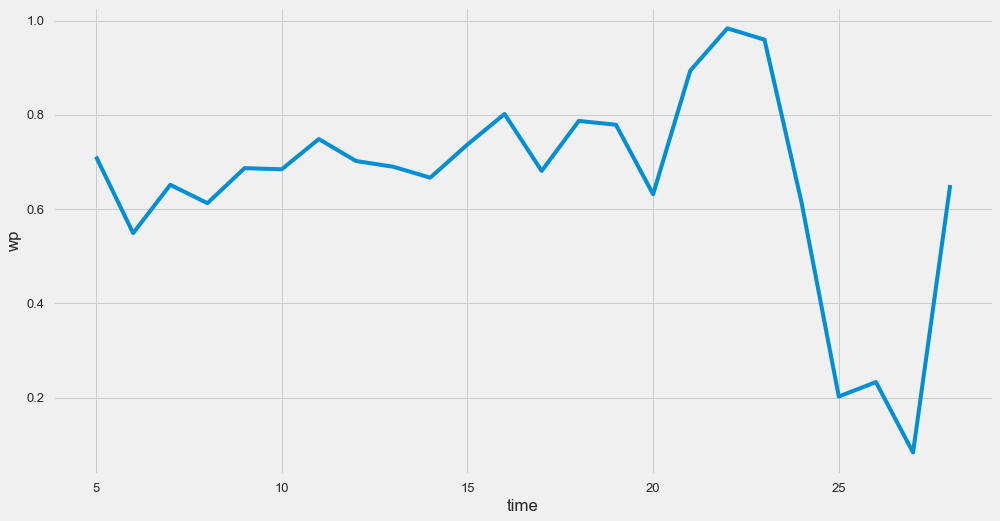

In [360]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (15, 8))
sns.lineplot(x = dfex['time'], y = dfex['wp'])

In [348]:
dfex.to_csv('example_game.csv')
dfr.to_csv('coef_table.csv')

In [351]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [286]:
dff.columns

Index(['bResult', 'gamelength', 'bKills', 'bTowers', 'bInhibs', 'bDragons',
       'bBarons', 'bHeralds', 'rKills', 'rTowers', 'rInhibs', 'rDragons',
       'rBarons', 'rHeralds', 'golddiff', 'goldblueTop', 'goldblueJungle',
       'goldblueMiddle', 'goldblueADC', 'goldblueSupport', 'goldredTop',
       'goldredJungle', 'goldredMiddle', 'goldredADC', 'goldredSupport',
       'Address'],
      dtype='object')

Text(0.5, 1.0, 'Objective Importance')

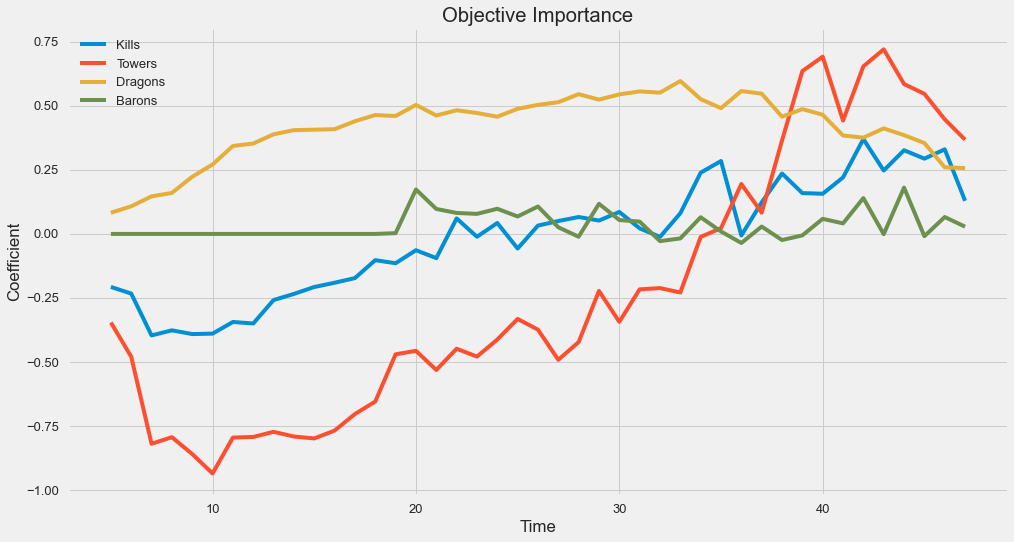

In [373]:

plt.figure(figsize = (15, 8))
for i in ['Kills', 'Towers', 'Dragons', 'Barons']:
    sns.lineplot(x = dfr['time'], y = dfr['b' + i] - dfr['r' + i], label = i)
    
plt.xlabel('Time')
plt.ylabel('Coefficient')
plt.title('Objective Importance')

Text(0.5, 1.0, 'Momentum - More Important as the Game Goes On')

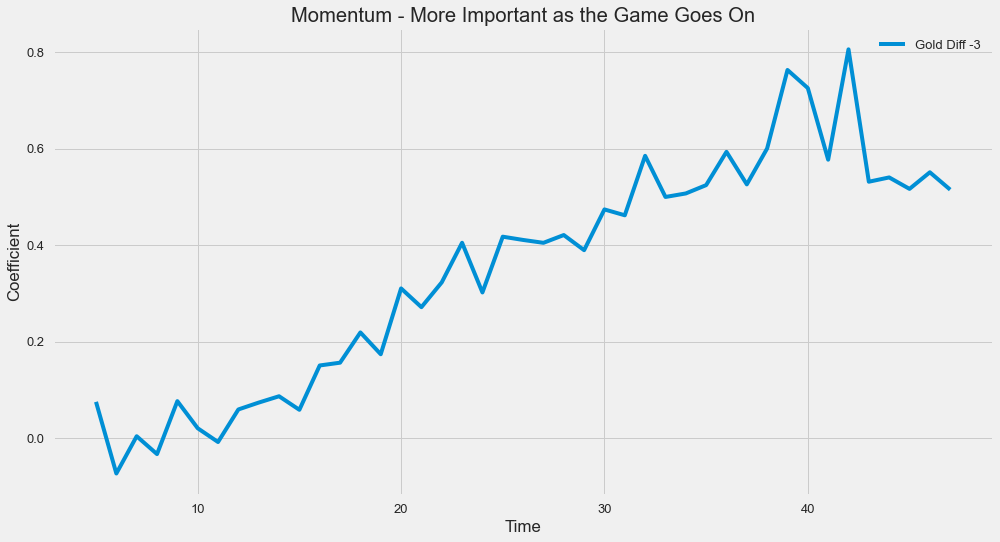

In [370]:

plt.figure(figsize = (15, 8))
for i in ['golddiff-3']:
    sns.lineplot(x = dfr['time'], y = dfr[i], label = 'Gold Diff -3')
    
plt.xlabel('Time')
plt.ylabel('Coefficient')
plt.title('Momentum - More Important as the Game Goes On')

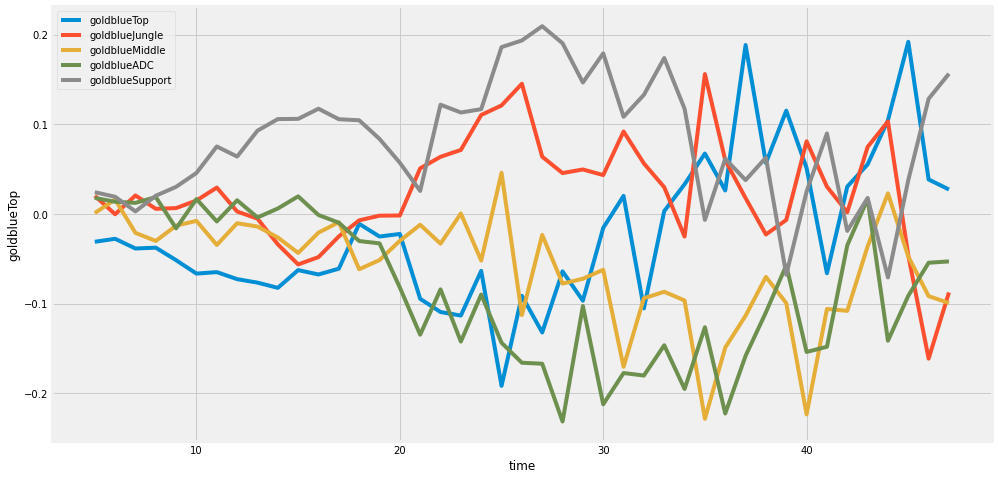

In [333]:

#plt.figure(figsize = (15, 8))
#for i in ['goldblueTop', 'goldblueJungle',
 #         'goldblueMiddle', 'goldblueADC', 'goldblueSupport']:
 #   sns.lineplot(x = dfr['time'], y = dfr[i], label = i)

Text(0.5, 1.0, 'Gold Differential Coefficient over Time')

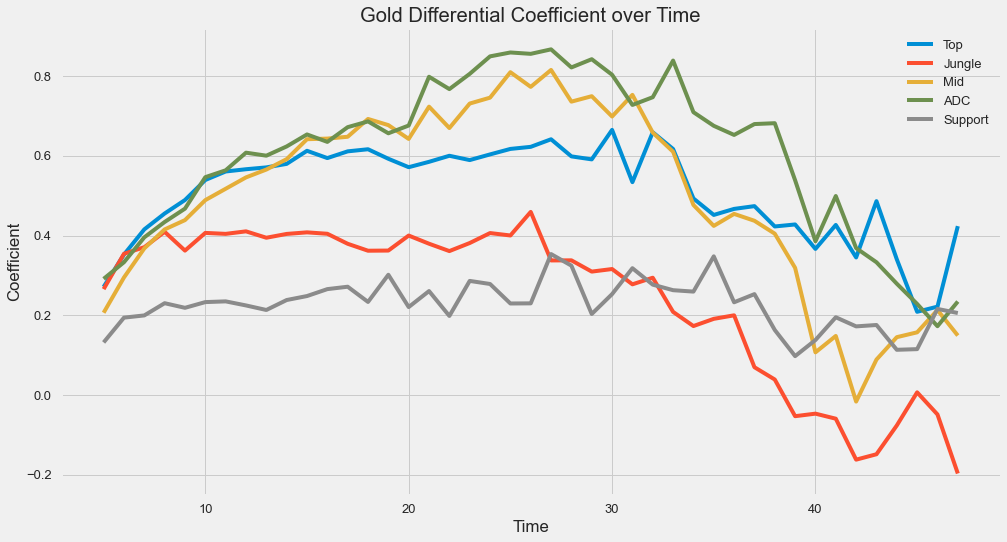

In [368]:

plt.figure(figsize = (15, 8))
for i,j in zip(['golddiffTop', 'golddiffJungle',
          'golddiffMiddle', 'golddiffADC', 'golddiffSupport'], ['Top', 'Jungle', 'Mid', 'ADC', 'Support']):
    sns.lineplot(x = dfr['time'], y = dfr[i], label = j)
    
plt.xlabel('Time')
plt.ylabel('Coefficient')
plt.title('Gold Differential Coefficient over Time')

Text(0.5, 1.0, 'Prediction Accuracy over Time')

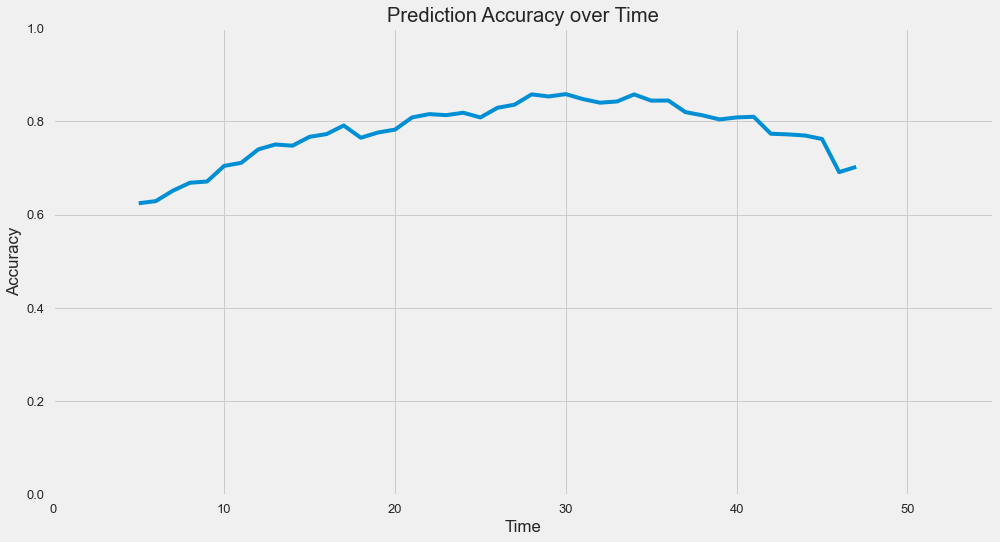

In [365]:
plt.figure(figsize = (15, 8))
fig = sns.lineplot(x = dfr['time'], y = dfr['score'])
fig.set(xlim = (0, 55))
fig.set(ylim = (0, 1))
plt.ylabel('Accuracy')
plt.xlabel('Time')
plt.title('Prediction Accuracy over Time')

In [342]:
dfr.loc[:,dfr.columns[2:-2]].idxmax(axis = 1)

5        golddiffADC
6     golddiffJungle
7        golddiffTop
8        golddiffTop
9        golddiffTop
10       golddiffADC
11       golddiffADC
12       golddiffADC
13       golddiffADC
14       golddiffADC
15       golddiffADC
16    golddiffMiddle
17       golddiffADC
18    golddiffMiddle
19    golddiffMiddle
20       golddiffADC
21       golddiffADC
22       golddiffADC
23       golddiffADC
24       golddiffADC
25       golddiffADC
26       golddiffADC
27       golddiffADC
28       golddiffADC
29       golddiffADC
30       golddiffADC
31    golddiffMiddle
32       golddiffADC
33       golddiffADC
34       golddiffADC
35       golddiffADC
36       golddiffADC
37       golddiffADC
38       golddiffADC
39        golddiff-3
40        golddiff-3
41        golddiff-3
42        golddiff-3
43        golddiff-3
44        golddiff-3
45        golddiff-3
46        golddiff-3
47        golddiff-3
dtype: object

In [ ]:
# Picking match to illustrate

In [345]:
df.loc[570]

League                                                          NALCS
Year                                                             2016
Season                                                         Spring
Type                                                         Playoffs
blueTeamTag                                                       TSM
bResult                                                             1
rResult                                                             0
redTeamTag                                                        CLG
gamelength                                                         29
golddiff            [0, -17, -42, -334, 137, 534, 276, 636, 495, 7...
goldblue            [2500, 2510, 2682, 4065, 5790, 8196, 9434, 109...
bKills              [[4.84, 'CLG Xmithie', 'TSM Svenskeren', ['TSM...
bTowers             [[28.353, 'MID_LANE', 'NEXUS_TURRET'], [15.869...
bInhibs                                        [[27.071, 'MID_LANE']]
bDragons            

In [343]:
df.loc[df['blueTeamTag'] == 'TSM'].sample(10)

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,golddiff,...,redMiddleChamp,goldredMiddle,redADC,redADCChamp,goldredADC,redSupport,redSupportChamp,goldredSupport,redBans,Address
44,NALCS,2015,Spring,Season,TSM,1,0,CST,24,"[0, 0, 33, 89, 137, 187, 1137, 1104, 2093, 364...",...,Zed,"[475, 475, 533, 856, 1208, 1615, 1867, 2089, 2...",Mash,Sivir,"[475, 475, 533, 751, 1107, 1474, 1756, 2065, 2...",Sheep,Blitzcrank,"[515, 515, 578, 702, 848, 993, 1116, 1287, 145...","['Lissandra', 'Kalista', 'Annie']",http://matchhistory.na.leagueoflegends.com/en/...
870,NALCS,2017,Summer,Season,TSM,0,1,IMT,33,"[0, 0, 44, 165, -82, 178, -108, 720, 731, 824,...",...,Syndra,"[500, 500, 560, 888, 1188, 1531, 1813, 2161, 2...",Cody Sun,Varus,"[500, 500, 540, 777, 1471, 1715, 2158, 2325, 2...",Olleh,Karma,"[500, 500, 531, 700, 871, 1051, 1234, 1480, 17...","['Zac', 'TahmKench', 'Taliyah', 'Ahri', 'Fizz']",http://matchhistory.na.leagueoflegends.com/en/...
134,NALCS,2015,Summer,Season,TSM,1,0,T8,41,"[0, 0, 8, -43, -964, -1152, -1029, -1085, -110...",...,Viktor,"[475, 475, 533, 836, 1136, 1458, 1670, 2004, 2...",Nien8,Sivir,"[475, 475, 533, 811, 1156, 1487, 1857, 2088, 2...",Dodo8,Annie,"[515, 515, 584, 732, 1082, 1221, 1364, 1505, 1...","['Ryze', 'Ekko', 'Gragas']",http://matchhistory.na.leagueoflegends.com/en/...
510,NALCS,2016,Summer,Season,TSM,1,0,P1,26,"[0, 0, -50, -21, -131, -183, -256, -595, -826,...",...,Azir,"[500, 500, 612, 937, 1392, 1787, 2019, 2433, 2...",Mash,Ezreal,"[500, 500, 517, 893, 1291, 1554, 1850, 2169, 2...",Gate,Braum,"[500, 500, 501, 688, 973, 1178, 1362, 1526, 17...","['Taliyah', 'Vladimir', 'Karma']",http://matchhistory.na.leagueoflegends.com/en/...
570,NALCS,2016,Spring,Playoffs,TSM,1,0,CLG,29,"[0, -17, -42, -334, 137, 534, 276, 636, 495, 7...",...,Corki,"[500, 500, 555, 885, 1294, 1720, 1984, 2363, 2...",Stixxay,Caitlyn,"[500, 500, 521, 885, 1117, 1440, 1804, 1981, 2...",aphromoo,Morgana,"[500, 527, 551, 759, 928, 1115, 1272, 1441, 16...","['Azir', 'Maokai', 'Nidalee']",http://matchhistory.na.leagueoflegends.com/en/...
6666,WC,2017,Summer,International,TSM,0,1,FW,25,"[0, 3, -45, 89, -439, -437, -552, -632, -1337,...",...,Corki,"[500, 500, 579, 905, 1270, 1549, 1747, 2098, 2...",Betty,KogMaw,"[500, 500, 522, 797, 1052, 1420, 1711, 2047, 2...",SwordArT,Janna,"[500, 500, 503, 734, 966, 1196, 1453, 1705, 19...","['Kalista', 'Gnar', 'JarvanIV', 'Ryze', 'Lebla...",http://matchhistory.na.leagueoflegends.com/en/...
722,NALCS,2017,Spring,Season,TSM,0,1,FLY,43,"[0, -8, -42, -562, -329, -100, -29, 116, 190, ...",...,Orianna,"[500, 500, 579, 888, 1252, 1451, 1845, 2138, 2...",Altec,Jhin,"[500, 500, 502, 751, 1011, 1224, 1517, 1895, 2...",LemonNation,Karma,"[500, 508, 529, 732, 934, 1101, 1272, 1418, 16...","['Varus', 'Camille', 'Shen', 'Zyra', 'Ryze']",http://matchhistory.na.leagueoflegends.com/en/...
589,NALCS,2016,Summer,Playoffs,TSM,1,0,CLG,44,"[0, 10, 47, 79, 398, 688, 355, 658, 792, 830, ...",...,Kassadin,"[500, 500, 562, 814, 1182, 1444, 1826, 2201, 2...",Stixxay,Jhin,"[500, 500, 588, 991, 1251, 1641, 1928, 2219, 2...",aphromoo,Karma,"[500, 500, 502, 675, 846, 1002, 1186, 1349, 15...","['TahmKench', 'Vladimir', 'Cassiopeia']",http://matchhistory.na.leagueoflegends.com/en/...
665,NALCS,2017,Spring,Season,TSM,1,0,CLG,26,"[0, 0, -10, 265, 287, 251, 753, 1234, 1307, 13...",...,Ryze,"[500, 500, 579, 939, 1197, 1623, 1857, 2215, 2...",Stixxay,Varus,"[500, 500, 542, 797, 1100, 1563, 1704, 2027, 2...",aphromoo,Morgana,"[500, 500, 515, 670, 860, 1019, 1183, 1343, 14...","['Rengar', 'Leblanc', 'Syndra', 'Malzahar', 'I...",http://matchhistory.na.leagueoflegends.com/en/...
909,NALCS,2017,Summer,Season,TSM,1,0,TL,32,"[0, 0, 0, -559, -429, -412, -350, 102, -795, -...",...,Cassiopeia,"[500, 500, 571, 862, 1152, 1484, 1776, 2105, 2...",Piglet,Ashe,"[500, 500, 501, 1229, 1429, 1876, 2182, 2523, ...",Matt,Bard,"[500, 500, 501, 846, 979, 1115, 1280, 1471, 17...","['Kennen', 'Zac', 'LeeSin', 'Orianna', 'Syndra']",http://matchhi